# Die Schweizer Bevölkerung stimmt ungleicher wie der Bundesrat ab wie früher
## Variablen: br-pos, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/807273038.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


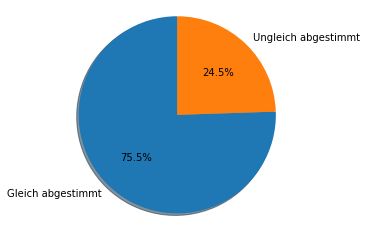

In [25]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'br-pos', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der br-pos 1 = Ja oder 2 = Nein
relevant_data = relevant_data[(relevant_data['br-pos'] == '1')|(relevant_data['br-pos'] == '2')]

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'br-pos':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# br-pos und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['br-pos'].replace({2: 0}, inplace=True)
equal_percentage = len(relevant_data[relevant_data['br-pos'] == relevant_data['annahme']])
not_equal_percentage = len(relevant_data) - equal_percentage

# Kuchendiagramm zeichnen
labels = 'Gleich abgestimmt', 'Ungleich abgestimmt'
sizes = [equal_percentage, not_equal_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Verifizierung Export Daten

In [24]:
# Imports
import pandas as pd
import datetime

# Daten einlesen
data = pd.read_csv('./export/buibid_br_pos_annahme.csv')

relevant_data = data[['datum','titel_kurz_d', 'br_pos', 'annahme']]

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'br_pos':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# Herausfiltern der br-pos 0 = Nein oder 1 = Ja
relevant_data = relevant_data[(relevant_data['br_pos'] == 0)|(relevant_data['br_pos'] == 1)]

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == 0)|(relevant_data['annahme'] == 1)]


equal_percentage = len(relevant_data[relevant_data['br_pos'] == relevant_data['annahme']])
not_equal_percentage = len(relevant_data) - equal_percentage
equal_percentage



398

## Generierung CSV Datei

In [23]:
# Imports
import pandas as pd
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'br-pos', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'br-pos': 'br_pos'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie br_pos mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] != '.')&(relevant_data['br_pos'] != '.')].dropna()

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'br_pos':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# br-pos und annahme die gleichen Zahlen für Ja und Nein benutzen
relevant_data['br_pos'].replace({2: 0}, inplace=True)

relevant_data.to_csv('./export/buibid_br_pos_annahme.csv', index=False)


/Users/yahart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/1834667488.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Die Schweizer Bevölkerung stimmt über die Jahre ungleicher mit den Parteiparolen der SVP ab.
## Variablen: p-svp, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1847/4175144252.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


,datum,titel_kurz_d,p-svp,annahme,ungleichheit-svp
523,2004-05-16 19:00:00,11. AHV-Revision,1,0,1
524,2004-05-16 20:00:00,Anhebung der Mehrwertsteuer zu Gunsten von AHV...,0,0,0
525,2004-05-16 21:00:00,Steuerpaket,1,0,1
526,2004-09-26 22:00:00,Erleichterte Einbürgerung von Jugendlichen der...,0,0,0
527,2004-09-26 23:00:00,Bürgerrechtserwerb für die dritte Generation,0,0,0


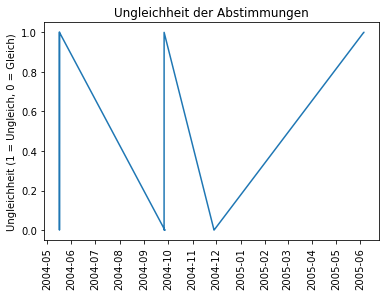

In [2]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'p-svp', 'annahme']]
relevant_data.head()


# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern der p-svp 1 = Ja oder 2 = Nein
relevant_data = relevant_data[(relevant_data['p-svp'] == '1')|(relevant_data['p-svp'] == '2')]

# Herausfiltern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'p-svp':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# p-svp und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['p-svp'].replace({2: 0}, inplace=True)


# Wert für "Ungleichheit" bestimmen, hierzu subtrahieren wir einfach die Werte voneinander
# Bei einer Übereinstimmung erhalten wir dann den Wert 0 und bei einer Ungleichheit entweder denn Wert 1 oder -1
# Wir nehmen im jeden Fall den absoluten Wert dann erhalten wir immer 1, somit ist 0 = Übereinstimmung und 1 = Ungleichheit
relevant_data['ungleichheit-svp'] = (relevant_data['p-svp'] - relevant_data['annahme']).abs()

# Balkendiagramm zeichnen
relevant_data = relevant_data[(relevant_data['datum'] > '2004-05-01') & (relevant_data['datum'] < '2005-08-01')]
x = relevant_data['datum']
y_svp = relevant_data['ungleichheit-svp']

fig, ax = plt.subplots()
ax.plot(x, y_svp)
ax.set(ylabel="Ungleichheit (1 = Ungleich, 0 = Gleich)", title="Ungleichheit der Abstimmungen")
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)
relevant_data.head()

## Generierung CSV Datei

In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'p-svp', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'p-svp': 'p_svp'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie br_pos mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] != '.')&(relevant_data['p_svp'] != '.')].dropna()

# br-pos sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'p_svp':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# 'annahme' benutzt für 0 = Nein und 1 = Ja, wir müssen deshalb die Daten umwandeln, damit die Variablen
# p-svp und annahme die gleichen Zahlen für Ja und Nein benutzen 
relevant_data['p_svp'].replace({2: 0}, inplace=True)


relevant_data.to_csv('./export/buibid_p_svp_annahme.csv', index=False)

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/3277644005.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Die Schweizer Bevölkerung ist ablehnend gegenüber einer Initiative/Referendum, wenn die Medienberichterstattung mehrheitlich ablehnend ist.
## Variablen: mediaton-tot, annahme

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_2356/912605802.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


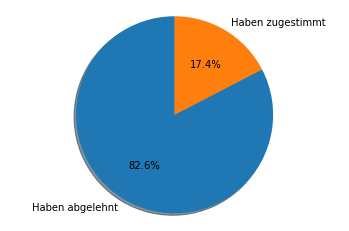

In [47]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'mediaton-tot', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Filtern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# Herausfiltern der mediaton-tot (es gibt Werte mit '.' oder ganz leer, welche wir nicht wollen)
relevant_data = relevant_data[relevant_data['mediaton-tot'] != '.']

# mediaton-tot sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'mediaton-tot':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

# Nur jene Resultate anschauen, wo die mediaton-tot Variable überwiegend negativ (< 0 ausfällt)
relevant_data = relevant_data[relevant_data['mediaton-tot'] < 0]

yes_percentage = len(relevant_data[relevant_data['annahme'] == 1])
no_percentage = len(relevant_data) - yes_percentage


# Kuchendiagramm zeichnen
labels = 'Haben abgelehnt', 'Haben zugestimmt'
sizes = [no_percentage, yes_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Generierung CSV Datei

In [21]:
# Imports
import pandas as pd
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'mediaton-tot', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'mediaton-tot': 'mediaton_tot'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie mediaton_tot mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['mediaton_tot'] != '.')&(relevant_data['annahme'] != '.')].dropna()

# mediaton-tot sowie annahme in korrekte Datentypen umwandeln
relevant_data = relevant_data.astype({'mediaton_tot':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

relevant_data.to_csv('./export/buibid_mediaton_tot_annahme.csv', index=False)

/Users/yahart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/3763799607.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


# Es gibt einen Zusammenhang zwischen dem Ja-Anteil der Abstimmungsresultate und der Anzahl des Ja-Anteils an Inseraten in Printmedien.
## Variablen: annahme, inserate-ja

/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/3275397371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")


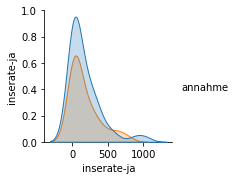

In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'inserate-ja', 'annahme']]

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Filtern der annahme 0 = Nein und 1 = Ja (es gibt annahmen mit '.', welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['annahme'] == '0')|(relevant_data['annahme'] == '1')]

# Herausfilter der inserate-ja mit '.'
relevant_data = relevant_data[(relevant_data['inserate-ja'] != '.')].dropna()

relevant_data = relevant_data.astype({'inserate-ja':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

sns.pairplot(relevant_data, hue = 'annahme')

## Generierung CSV Datei

In [19]:
# Imports
import pandas as pd
import numpy as np
import datetime

# Daten einlesen
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Nur relevante Daten behalten
relevant_data = data[['datum','titel_kurz_d', 'inserate-ja', 'annahme']]

# '-' sind in Hive nicht erlaubt
relevant_data.rename(columns={'inserate-ja': 'inserate_ja'}, inplace=True)

# Datum in korrekte Datentypen umwandeln
relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")

# Es kann mehrere Abstimmungen am gleichen Tag geben, sprich wir haben mehrere Einträge mit dem selben Datum.
# Damit die Einträge eindeutig bleiben und anschliessend auch auf Liniendiagramme angezeigt werden können, versehen wir diese mit einer zeitlichen Komponente.
for i in relevant_data.index:
    relevant_data.at[i, 'datum']  = relevant_data.at[i, 'datum'] + datetime.timedelta(hours = i % 24)

# Herausfiltern ungültiger Einträge (es gibt annahmen sowie br_pos mit '.' sowie leere Einträge, welche wir nicht wollen)
relevant_data = relevant_data[(relevant_data['inserate_ja'] != '.')&(relevant_data['annahme'] != '.')].dropna()

relevant_data = relevant_data.astype({'inserate_ja':'int'})
relevant_data = relevant_data.astype({'annahme':'int'})

relevant_data.to_csv('./export/buibid_inserate_ja_annahme.csv', index=False)

/Users/yahart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/hn/wqf6qfkj2mg6b6lxlws_0z180000gn/T/ipykernel_1257/4248001924.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datum'] = pd.to_datetime(relevant_data['datum'], format="%d.%m.%Y")
